In [1]:
import torch
import torch.optim as optim
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [2]:
# Load saved DataLoader, model and optimizer

path_model = './output/best_model_optmiSGD_lossCrossEntrop_dav.pth'
path_optimizer = './output/best_optim_optmiSGD_lossCrossEntrop_dav.pth'

test_set = torch.load('./output/test_loader.pth')
train_set = torch.load('./output/train_loader.pth')
valid_set = torch.load('./output/valid_loader.pth')
batch_size = 25

models = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
num_classes = 23
models.fc = torch.nn.Linear(models.fc.in_features, num_classes)
models.load_state_dict(torch.load(path_model))

optimizers = optim.SGD(models.parameters(), lr=0.001, momentum=0.9)


Using cache found in /home/hub/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/home/hub/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/home/hub/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(


In [3]:
models.eval()
outputs_pred = []
outputs_true = []
with torch.no_grad(): 
    test_error_count = 0.0
    for images, labels in iter(test_set):
        outputs = models(images)
        outputs_true.append(labels)
        outputs_pred.append(outputs.argmax(1))
        # for x in outputs:
        #     probabilities = torch.nn.functional.softmax(x, dim=0)
        test_error_count += float(len(labels[labels != outputs.argmax(1)]))
    test_accuracy = 1.0 - float(test_error_count) / float(len(test_set)*batch_size)
    print('accuracy test set: %f' % (test_accuracy))

accuracy test set: 0.789643


In [4]:
# Map label back to artists
path_label_artists = pd.read_csv('./output/path_label_artists.csv')
to_use = path_label_artists[['artist', 'label']].drop_duplicates()
dic = to_use.set_index('label')['artist'].to_dict()

In [5]:
# Tensor to int
outputs_true = [int(x) for x in sum([list(x) for x in outputs_true], [])]
outputs_pred  = [int(x) for x in sum([list(x) for x in outputs_pred], [])]

outputs_true_artists = list(map(dic.get, outputs_true))
outputs_pred_artists  = list(map(dic.get, outputs_pred))

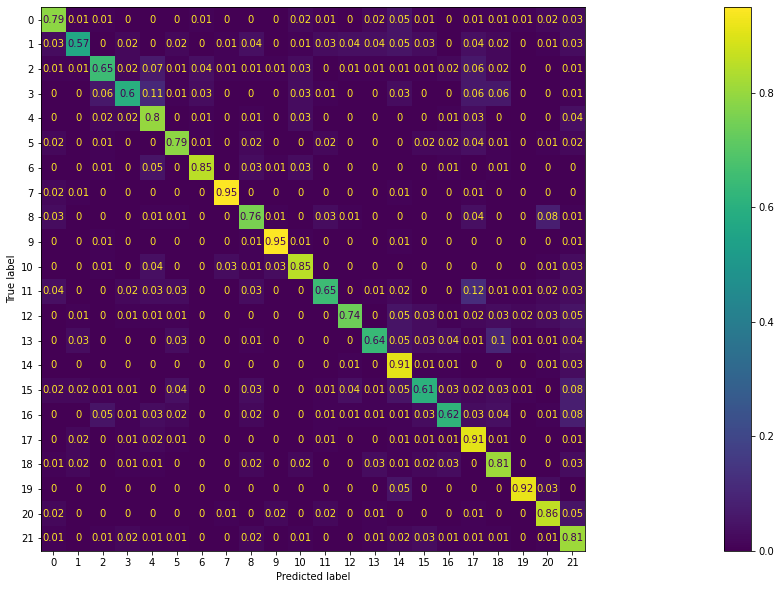

In [6]:
# Display Confusion matrix with labels
plt.rcParams["figure.figsize"] = (50,10)
cm = confusion_matrix(outputs_true, outputs_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=np.round(cm, 2))
disp.plot()

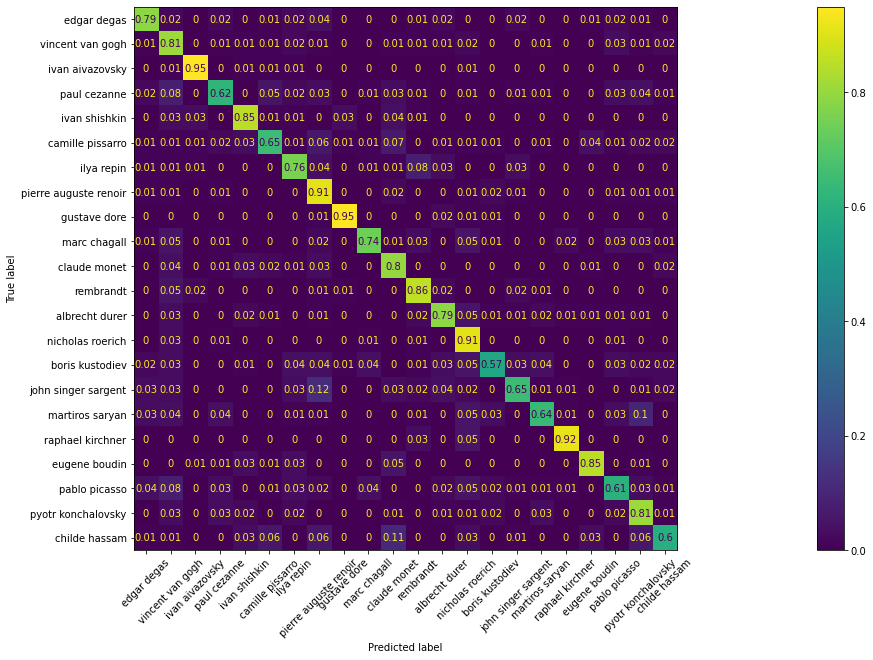

In [7]:
# Display Confusion matrix with artist names
plt.rcParams["figure.figsize"] = (50,10)
cm = confusion_matrix(outputs_true_artists, outputs_pred_artists, labels = list(dic.values()), normalize = 'true')
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round(cm, 2), display_labels = list(dic.values())
    )
disp.plot(xticks_rotation= 45.0)

In [8]:
def confusion_matrix_bis(outputs_true, outputs_pred):
    '''
    Input: 
        outputs_true: pytorch tensor
        outputs_pred: pytorch tensor
    '''

    path_label_artists = pd.read_csv('./output/path_label_artists.csv')
    to_use = path_label_artists[['artist', 'label']].drop_duplicates()
    dic = to_use.set_index('label')['artist'].to_dict()

    # outputs_true = [int(x) for x in sum([list(x) for x in outputs_true], [])]
    # outputs_pred  = [int(x) for x in sum([list(x) for x in outputs_pred], [])]
    outputs_true_artists = list(map(dic.get, outputs_true))
    outputs_pred_artists  = list(map(dic.get, outputs_pred))

    plt.rcParams["figure.figsize"] = (50,10)
    cm = confusion_matrix(outputs_true_artists, outputs_pred_artists, labels = list(dic.values()), normalize = 'true')
    disp = ConfusionMatrixDisplay(
        confusion_matrix=np.round(cm, 2), display_labels = list(dic.values())
    )
    disp.plot(xticks_rotation= 45.0)

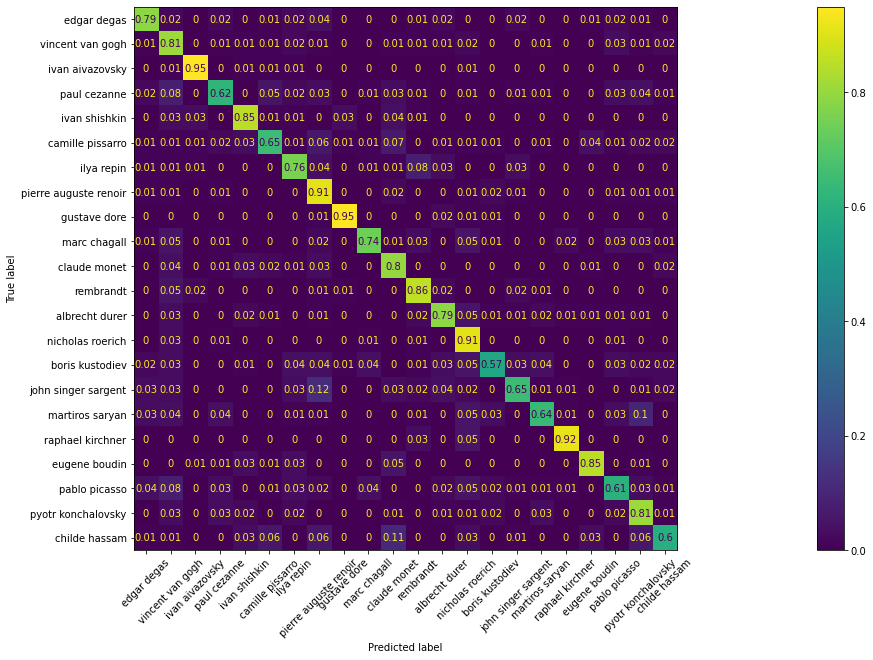

In [9]:
confusion_matrix_bis(outputs_true, outputs_pred)